In [1]:
! pip install lazypredict

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
import numpy as np

In [7]:
url='https://raw.githubusercontent.com/Keshav6265/Drug-discovery/main/descriptor/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp%20%20(1).csv'
df=pd.read_csv(url)
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10


In [20]:
df.shape

(6369, 882)

In [21]:
df = df[~np.isnan(df).any(axis=1)]
df = df[~np.isinf(df).any(axis=1)]

In [22]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [23]:
# Examine X dimension
X.shape

(6368, 881)

In [24]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(6368, 145)

In [25]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:24<00:01,  1.42s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 5094, number of used features: 145
[LightGBM] [Info] Start training from score 5.817427


100%|██████████| 42/42 [01:24<00:00,  2.02s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [01:14<00:00,  1.11it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 5094, number of used features: 145
[LightGBM] [Info] Start training from score 5.817427


100%|██████████| 42/42 [01:14<00:00,  1.78s/it]


In [28]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.87,0.88,0.54,0.20
ExtraTreeRegressor,0.87,0.88,0.54,0.21
ExtraTreesRegressor,0.87,0.88,0.54,11.17
GaussianProcessRegressor,0.87,0.88,0.54,15.50
RandomForestRegressor,0.84,0.84,0.61,7.59
BaggingRegressor,0.82,0.83,0.64,0.84
XGBRegressor,0.82,0.83,0.65,0.49
MLPRegressor,0.80,0.80,0.69,10.76
HistGradientBoostingRegressor,0.67,0.68,0.87,1.86


In [29]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.42,0.49,1.14,8.54
HistGradientBoostingRegressor,0.41,0.48,1.16,2.19
XGBRegressor,0.41,0.47,1.16,0.43
LGBMRegressor,0.39,0.46,1.17,0.48
BaggingRegressor,0.38,0.45,1.19,0.78
NuSVR,0.36,0.43,1.21,2.68
SVR,0.36,0.43,1.21,3.29
KNeighborsRegressor,0.34,0.42,1.22,0.17
MLPRegressor,0.30,0.38,1.26,13.33


[(0.0, 1.0)]

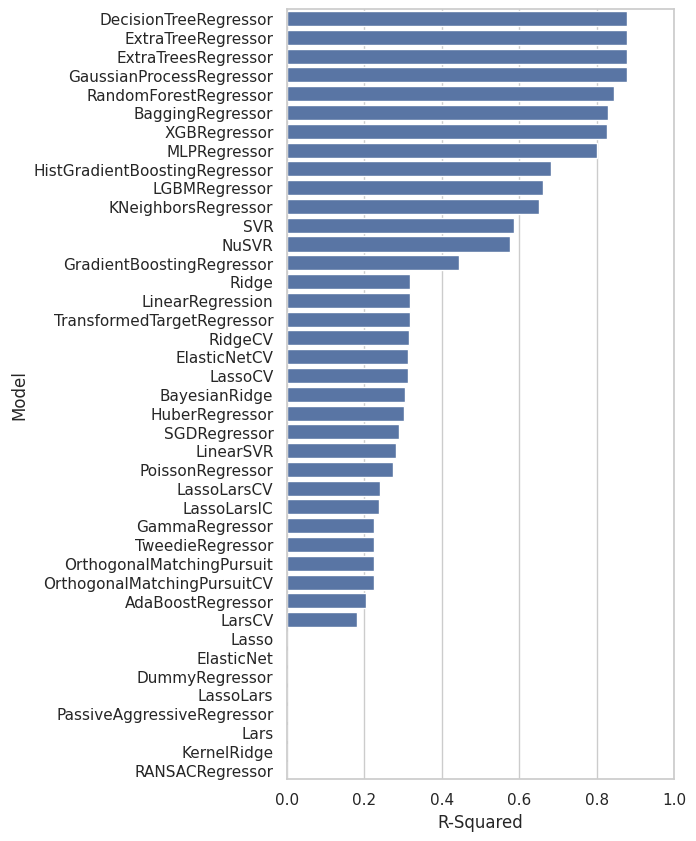

In [30]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

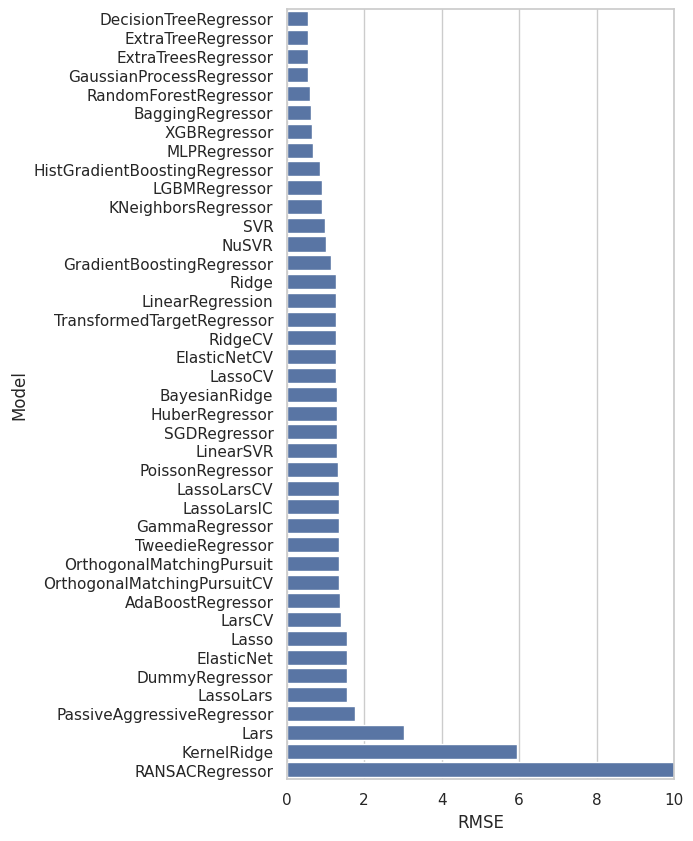

In [31]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

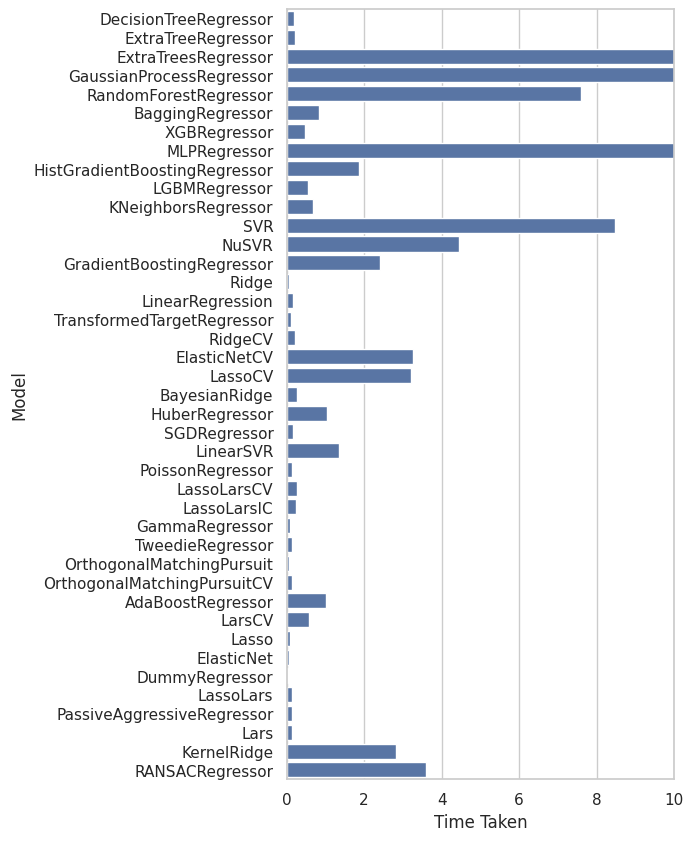

In [32]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))